In [6]:
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

**1. Load and preprocess the data**

In [7]:
#Import the dataframe
df = pd.read_csv('Mx1RGvsMx1_pos_enrichment.csv')

#Replace the _ with spaces
df['NAME'] = df['NAME'].str.replace('_', ',')

In [8]:
df.head()

,NAME,NES,FDR q-val
0,"HALLMARK,TNFA,SIGNALING,VIA,NFKB,MSIGDB,C2,HAL...",3.017132,0.000000
1,"INTERLEUKIN,10,SIGNALING,REACTOME,R,HSA,6783783,3",2.570119,0.000000
2,"TOLL,LIKE,RECEPTOR,SIGNALING,PATHWAY,GOBP,GO,0...",2.407094,0.000000
3,"INNATE,IMMUNE,RESPONSE,ACTIVATING,SIGNAL,TRANS...",2.257223,0.001688
4,"ANTIGEN,PROCESSING,AND,PRESENTATION,OF,EXOGENO...",2.252042,0.001815


In [9]:
words_list = ''.join(every_line for every_line in df['NAME']).split(',')

**2. List stopwords and remove them**

In [10]:
my_stopwords = set(STOPWORDS)
my_stopwords.update(['GO', 'GOBP', 'REGULATION','VIA ', 'C2'])

In [11]:
for word in list(words_list):
    if word in my_stopwords:
        words_list.remove(word)

In [12]:
text = ' '.join(word for word in words_list)
len(text)

133689

**3. Generate the wordcloud**

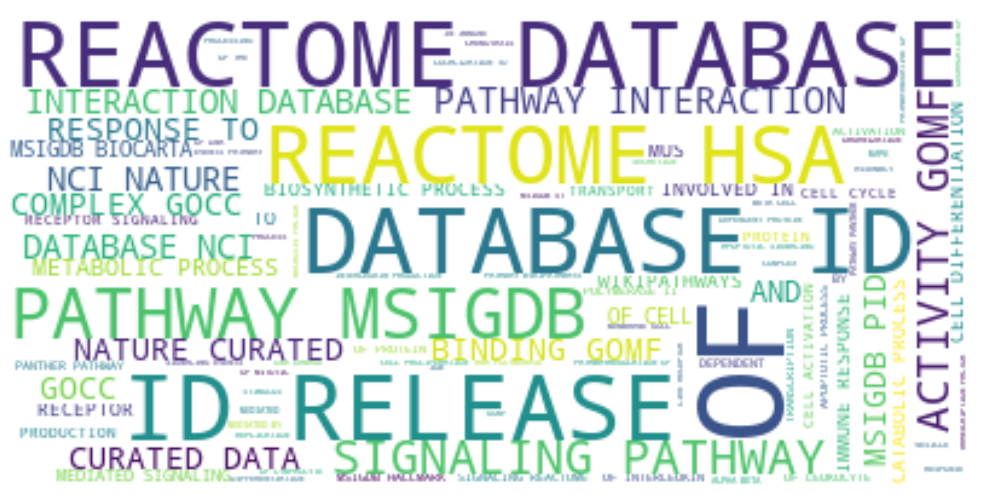

In [16]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white",
                      stopwords=my_stopwords).generate(text)

# Display the wordcloud!
figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**4. Miscellaneous (Function for you to play around)**

In [17]:
def word_cloud_stopwords(specify_stopwords):
    
    ''' Function which displays the wordcloud by removing specific stopwords
    ---------    
    Argument:
        specify_stopwords : list of stopwords to be removed
    ---------
    Returns:
        a word cloud image
    
    '''
    # Creates a word list from the df column
    words_list = ''.join(every_line for every_line in df['NAME']).split(',')
    
    # Create the default STOPWORDS + words to be updated
    my_stopwords = set(STOPWORDS)
    my_stopwords.update(specify_stopwords)
    
    # Removes the stop words from the list
    for word in list(words_list):
        if word in my_stopwords:
            words_list.remove(word)
            
    # Join it so that it all comes under one string as a massive sentence
    text = ' '.join(word for word in words_list)
    
    # Invoke the worcloud function
    wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white",
                      stopwords=my_stopwords).generate(text)

    # Display the wordcloud!
    figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

**Keep using the following iteratively to remove or keep words**

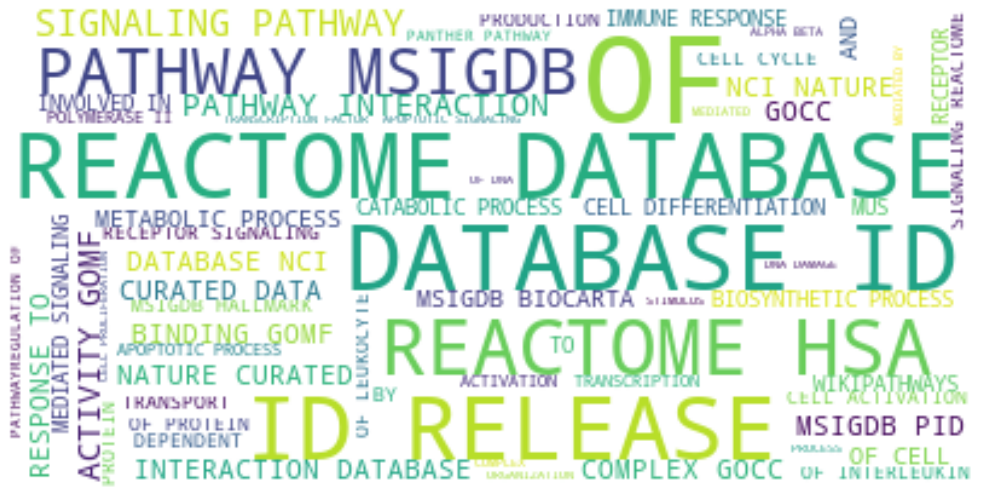

In [18]:
specify_stopwords = ['GO', 'GOBP', 'REGULATION','VIA ', 'C2']
word_cloud_stopwords(specify_stopwords)